<a href="https://colab.research.google.com/github/aalonsca73/in_silico_toxicology/blob/main/PCA_PLS_DA_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

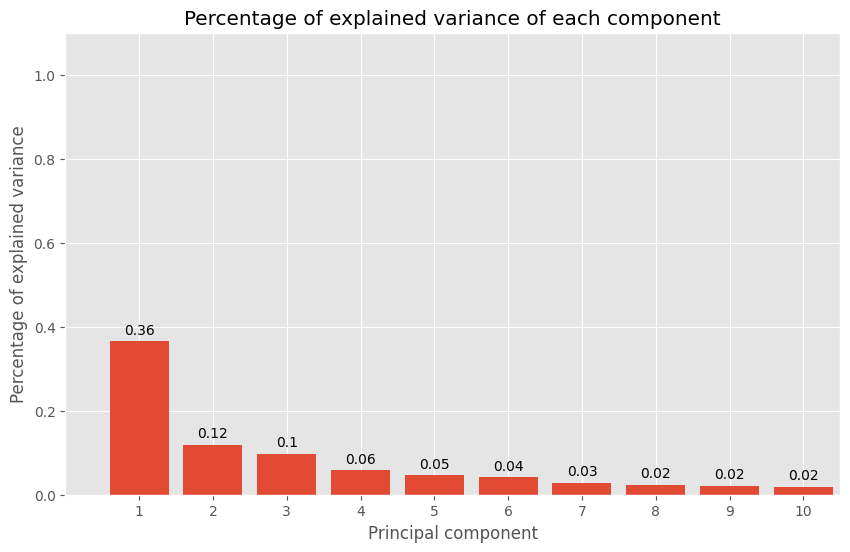

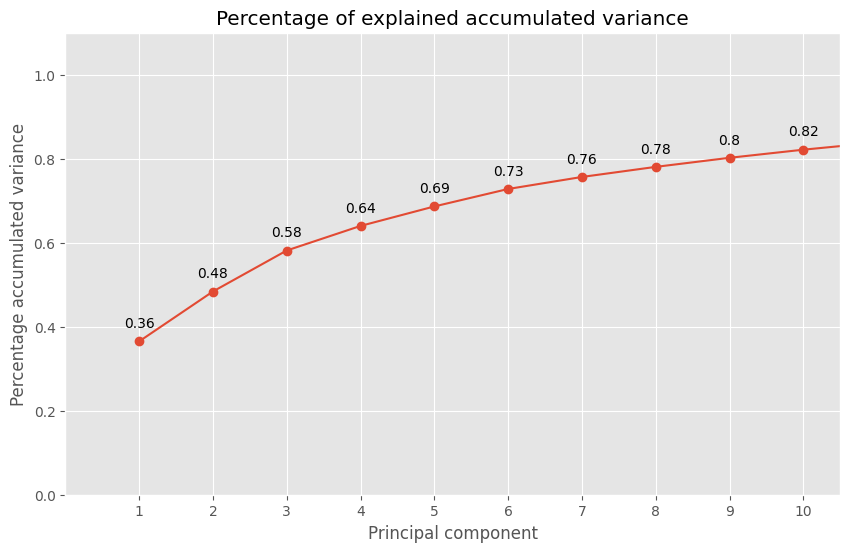

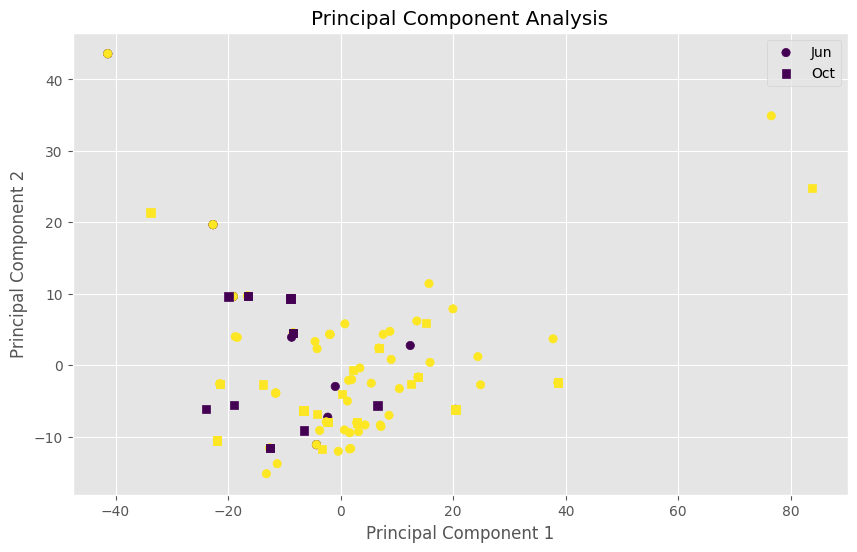

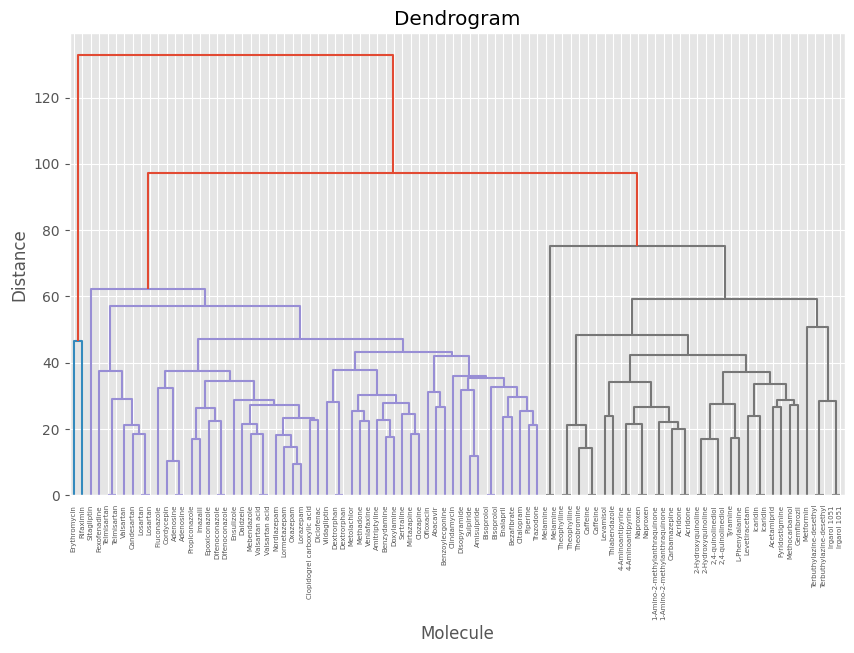

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_100 (Conv1D)         (None, 90, 32)            128       
                                                                 
 flatten_52 (Flatten)        (None, 2880)              0         
                                                                 
 dense_52 (Dense)            (None, 2)                 5762      
                                                                 
Total params: 5890 (23.01 KB)
Trainable params: 5890 (23.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 22ms/step - loss: 0.7937 - accuracy: 0.7895
Score for fold 1: loss of 0.79374760389328; accuracy of 78.94737124443054%


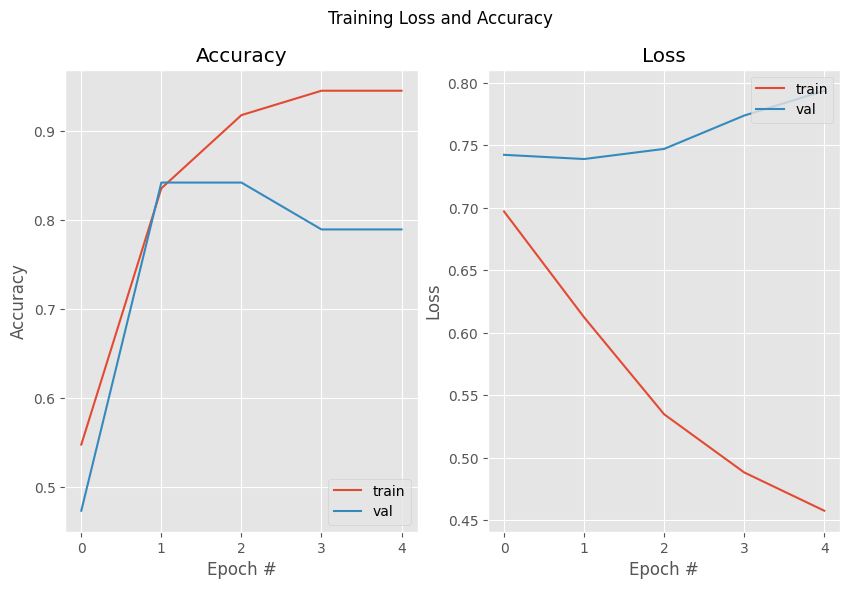

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_101 (Conv1D)         (None, 90, 32)            128       
                                                                 
 flatten_53 (Flatten)        (None, 2880)              0         
                                                                 
 dense_53 (Dense)            (None, 2)                 5762      
                                                                 
Total params: 5890 (23.01 KB)
Trainable params: 5890 (23.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 18ms/step - loss: 0.7135 - accuracy: 0.7895
Score for fold 2: loss of 0.7135008573532104; accuracy of 78.94737124443054%


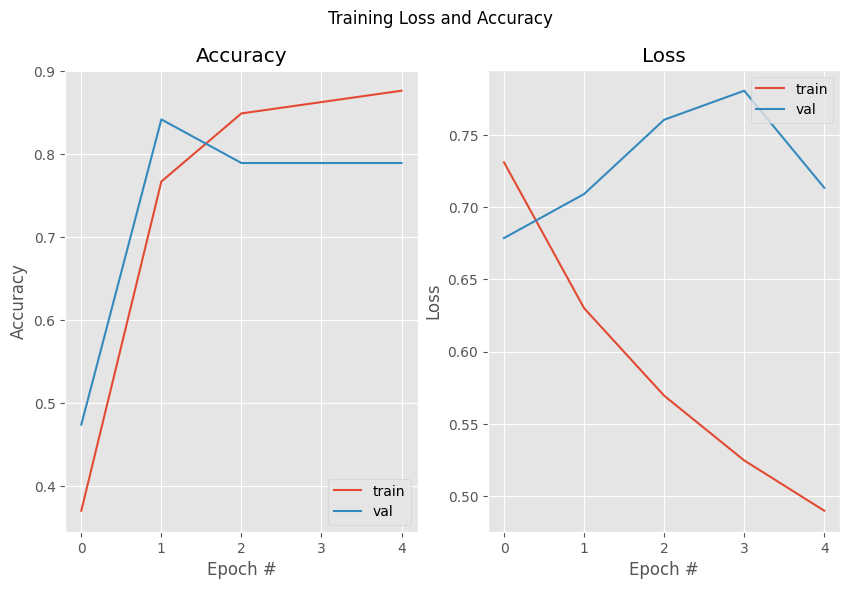

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_102 (Conv1D)         (None, 90, 32)            128       
                                                                 
 flatten_54 (Flatten)        (None, 2880)              0         
                                                                 
 dense_54 (Dense)            (None, 2)                 5762      
                                                                 
Total params: 5890 (23.01 KB)
Trainable params: 5890 (23.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 23ms/step - loss: 0.7001 - accuracy: 0.7778
Score for fold 3: loss of 0.7000527381896973; accuracy of 77.77777910232544%


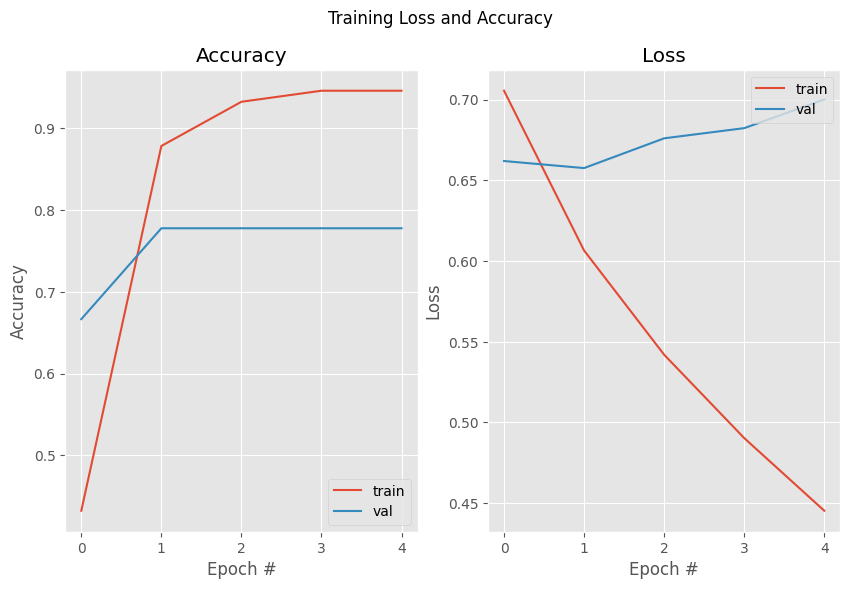

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_103 (Conv1D)         (None, 90, 32)            128       
                                                                 
 flatten_55 (Flatten)        (None, 2880)              0         
                                                                 
 dense_55 (Dense)            (None, 2)                 5762      
                                                                 
Total params: 5890 (23.01 KB)
Trainable params: 5890 (23.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 18ms/step - loss: 0.9441 - accuracy: 0.7778
Score for fold 4: loss of 0.9441096782684326; accuracy of 77.77777910232544%


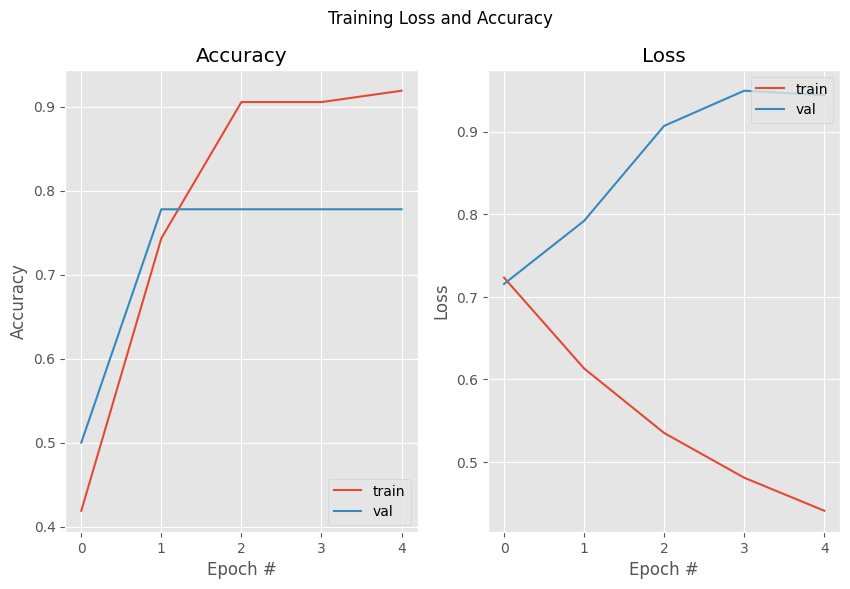

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_104 (Conv1D)         (None, 90, 32)            128       
                                                                 
 flatten_56 (Flatten)        (None, 2880)              0         
                                                                 
 dense_56 (Dense)            (None, 2)                 5762      
                                                                 
Total params: 5890 (23.01 KB)
Trainable params: 5890 (23.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 21ms/step - loss: 0.6776 - accuracy: 0.8333
Score for fold 5: loss of 0.6776366829872131; accuracy of 83.33333134651184%


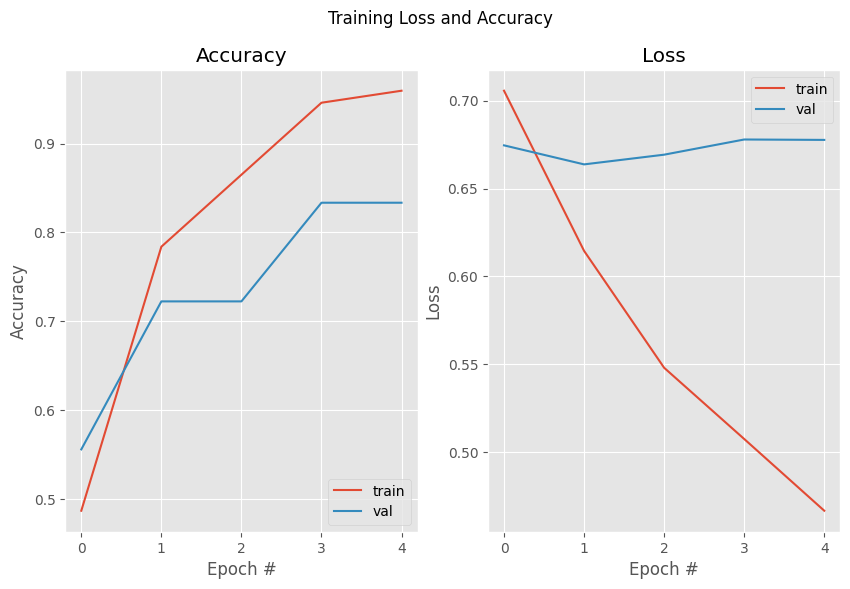

In [56]:
# Define the filename for the CSV file
filename = 'molecules_with_properties_CEC.csv'
labels_filename = 'llistes.xlsx'

# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import style
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.model_selection import cross_val_predict, train_test_split, KFold, StratifiedKFold
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from scipy.cluster.hierarchy import linkage, dendrogram
from sys import stdout
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten

# Set the style for the plot
style.use('ggplot') # or plt.style.use('ggplot')

# Read the CSV file using pandas
df = pd.read_csv(filename)

def preprocess_data(df,labels_filename,index_column='Name',label_column='CEC',drop_column='SMILES'):
  """
  Preprocess the data by reading labels from an Excel file, setting index columns, and filtering common compounds.

  Parameters:
    - df: DataFrame containing the main data
    - labels_filename: Filename of the Excel file containing labels
    - index_column: Name of the column to set as the index in the main DataFrame
    - label_column: Name of the column to set as the index in the labels DataFrame
    - drop_column: Name of the column to be dropped from the main DataFrame

   Returns:
    - filtered_df: Processed DataFrame with common compounds and dropped column
    - filtered_labels_df: Labels DataFrame with common compounds
   """
  # Read labels from Excel file
  labels_df = pd.read_excel(labels_filename,sheet_name=0,header=0)

  # Remove specified column from the main DataFrame
  filtered_df = df.drop(columns=drop_column)

  # Set the specified column as the index in the main DataFrame
  filtered_df = filtered_df.set_index(index_column)

  # Set the specified column as the index in the labels DataFrame
  labels_df = labels_df.set_index(label_column)

  # Find compounds that appear in both dataframes
  common_compounds = filtered_df.index.intersection(labels_df.index)

  # Filter to keep only the labels of common compounds
  filtered_labels_df = labels_df.loc[common_compounds]

  return filtered_df, filtered_labels_df

filtered_df, filtered_labels_df = preprocess_data(df, labels_filename)

# Training PCA model with scaled data
pca_pipe = make_pipeline(StandardScaler(),PCA())
pca_pipe.fit(filtered_df)

# Extraction of the trained model from the pipeline
pca_model = pca_pipe.named_steps['pca']

# Transformation of the scaled data to obtain Principal Components
transformed_data = pca_pipe.transform(filtered_df)

# Convert array to dataframe
PCA = pd.DataFrame(data=transformed_data,index=filtered_df.index)

# Percentage of explained variance of each component
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
ax.bar(x=np.arange(pca_model.n_components_)+1,
       height = pca_model.explained_variance_ratio_)

# Add labels to the bars
for x,y in zip(np.arange(len(filtered_df.columns))+1, pca_model.explained_variance_ratio_):
    label = round(y,2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,5),ha='center')

ax.set_xticks(np.arange(pca_model.n_components_)+1)
ax.set_xlim(0,10.5)
ax.set_ylim(0,1.1)
ax.set_title('Percentage of explained variance of each component')
ax.set_xlabel('Principal component')
ax.set_ylabel('Percentage of explained variance')

# Proportion of accumulated variance
prop_var_accum = pca_model.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,6))
ax.plot(np.arange(len(pca_model.components_))+1,
        pca_model.explained_variance_ratio_.cumsum(), marker = 'o')

# Add labels to the data points
for x,y in zip(np.arange(len(filtered_df.columns))+1,pca_model.explained_variance_ratio_.cumsum()):
  label = round(y, 2)
  ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')

ax.set_xticks(np.arange(pca_model.n_components_)+1)
ax.set_xlim(0,10.5)
ax.set_ylim(0,1.1)
ax.set_title('Percentage of explained accumulated variance')
ax.set_xlabel('Principal component')
ax.set_ylabel('Percentage accumulated variance')

# Add 'Campaña' labels to the PCA DataFrame
PCA_labels = pd.merge(PCA,filtered_labels_df,on=PCA.index)

# PCA
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# Filter rows for 'Campaña'=='Jun'
jun_data = PCA_labels.query("Campaña == 'Jun'")
label_color_dict_jun = {label:idx for idx,label in enumerate(np.unique(jun_data['Cluster']))}
cvec_jun = [label_color_dict_jun[word] for word in jun_data['Cluster']]
ax.scatter(jun_data.loc[:, 0], jun_data.loc[:, 1], c=cvec_jun, marker='o', label='Jun')

# Filter rows for 'Campaña'=='Oct'
oct_data = PCA_labels.query("Campaña == 'Oct'")
label_color_dict_oct = {label:idx for idx,label in enumerate(np.unique(oct_data['Cluster']))}
cvec_oct = [label_color_dict_oct[word] for word in oct_data['Cluster']]
ax.scatter(oct_data.loc[:, 0], oct_data.loc[:, 1], c=cvec_oct, marker='s', label='Oct')

ax.set_title('Principal Component Analysis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.legend()  # Add legend to distinguish between 'Jun' and 'Oct'

# Clustering
complete_clustering = linkage(PCA,method="complete",metric="euclidean")
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))
dendrogram(complete_clustering,labels=filtered_df.index)

ax.set_title('Dendrogram')
ax.set_xlabel('Molecule')
ax.set_ylabel('Distance')

# Show the plots
plt.show()

# PLS regression
def optimise_pls_cv(X,y,n_comp,plot_components=True):
  """
  Optimize the number of components for Partial Least Squares (PLS) regression using cross-validation.

  Parameters:
  - X: Input features
  - y: Target variable
  - n_comp: Maximum number of components to test
  - plot_components: Whether to plot the optimization results

  Returns:
  None
  """

  # Run PLS including a variable number of components, up to n_comp, and calculate MSE
  mse = []
  component = np.arange(1,n_comp)

  for i in component:
    pls = PLSRegression(n_components=i)

    # Cross-validation
    y_cv = cross_val_predict(pls,X,y,cv=10)

    mse.append(mean_squared_error(y,y_cv))

    comp = 100*(i+1)/n_comp
    # Update status
    stdout.write("\r%d%% completed" % comp)
    stdout.flush()
  stdout.write("\n")

  # Calculate and print the position of minimum in MSE
  msemin = np.argmin(mse)
  print("Suggested number of components: ",msemin+1)
  stdout.write("\n")

  if plot_components is True:
    plt.figure(figsize=(10,6))
    plt.plot(component,np.array(mse), '-v', color = 'blue', mfc = 'blue')
    plt.plot(component[msemin],np.array(mse)[msemin], 'P', ms=10,mfc='red')
    plt.xlabel('Number of PLS components')
    plt.ylabel('MSE')
    plt.title('PLS')
    plt.xlim(left=-1)
    plt.show()

  # Define PLS object with optimal number of components
  pls_opt = PLSRegression(n_components=msemin+1)

  # Fit to the entire dataset
  pls_opt.fit(X,y)
  y_c = pls_opt.predict(X)

  # Cross-validation
  y_cv = cross_val_predict(pls_opt,X,y,cv=10)

  # Calculate scores for calibration and cross-validation
  score_c = r2_score(y,y_c)
  score_cv = r2_score(y, y_cv)

  # Calculate mean squared error for calibration and cross validation
  mse_c = mean_squared_error(y, y_c)
  mse_cv = mean_squared_error(y, y_cv)

  print('R2 calib: %5.3f'  % score_c)
  print('R2 CV: %5.3f'  % score_cv)
  print('MSE calib: %5.3f' % mse_c)
  print('MSE CV: %5.3f' % mse_cv)

  # Plot regression and figures of merit
  rangey = max(y) - min(y)
  rangex = max(y_c) - min(y_c)

  # Fit a line to the CV vs response
  z = np.polyfit(y, y_c, 1)
  fig,ax = plt.subplots(figsize=(10,6))
  ax.scatter(y_c, y, c='red',edgecolors='k')
  # Plot the best fit line
  ax.plot(np.polyval(z,y),y,c='blue',linewidth=1)
  # Plot the ideal 1:1 line
  ax.plot(y,y,color='green',linewidth=1)
  plt.title('$R^{2}$ (CV):'+str(score_cv))
  plt.xlabel('Predicted response')
  plt.ylabel('Measured response')

  y_pred = (y_c>0.5).astype('uint8')
  plt.show()

  # Confusion matrix
  print(f'Accuracy score: {round(accuracy_score(y,y_pred),3)}')
  cf_mat = confusion_matrix(y,y_pred)
  # Create a DataFrame for better visualization
  confusion_df = pd.DataFrame(cf_mat, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
  print('Confusion matrix')
  print(confusion_df)

  # Plot ROC curve
  fig,ax=plt.subplots(figsize=(10,6))
  fpr,tpr,thresholds = roc_curve(y,y_pred)
  ax.plot(fpr,tpr)
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.set_title('ROC Curve')

  print(f'AUC score: {round(roc_auc_score(y,y_pred),2)}')

  plt.show()

  return


# Change labels to 0 and 1
filtered_labels_df['Cluster'].replace(to_replace=['Recalcitrants','Removed'],value=[0,1],inplace=True)
y = np.array(filtered_labels_df['Cluster'],dtype=int)

# Application of the function
#optimise_pls_cv(PCA,y,len(PCA.columns)+1,plot_components=True)

# Convolutional neural network
def cnn_model(X,y,num_folds=5,n_epoch=30,plot_prediction=True):
  """
  Convolutional neural network to make binary classification.

  Parameters:
    - X: Input features
    - y: Target variable
    - num_folds: Number of folds to do the K-Fold

  Returns:
    None
  """
  # Define the K-fold Cross Validator
  kfold = StratifiedKFold(n_splits=num_folds,shuffle=True,random_state=8)

  # K-fold Cross Validation model evaluation
  fold_no = 1
  # Define per-fold score containers
  acc_per_fold = []
  loss_per_fold = []

  for train, test in kfold.split(X,y):

    X_train, X_test = X[train].T, X[test].T
    Y_train, Y_test = y[train], y[test]
    x_train = X_train.to_numpy().reshape(X_train.shape[0],X_train.shape[1],1)
    x_test = X_test.to_numpy().reshape(X_test.shape[0],X_test.shape[1],1)
    y_train = to_categorical(Y_train)
    y_test = to_categorical(Y_test)
    input_shape = (X_train.shape[1],1)
    # Define the model architecture
    model = Sequential()
    model.add(Conv1D(32,kernel_size=3,activation="relu",input_shape=input_shape))
    #model.add(Conv1D(64,kernel_size=3,activation="relu"))
    model.add(Flatten())
    model.add(Dense(2,activation="softmax"))
    model.summary()
    # Compile the model
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    # Fit data to model
    model_fit = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=30,epochs=n_epoch, verbose=0)
    # Generate generalization metrics
    scores = model.evaluate(x_test,y_test)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1]*100)
    loss_per_fold.append(scores[0])
    # Increase fold number
    fold_no = fold_no + 1

    if plot_prediction is True:
      fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,6))
      fig.suptitle('Training Loss and Accuracy')

      ax1.plot(np.arange(0,n_epoch),model_fit.history["accuracy"],label="train")
      ax1.plot(np.arange(0,n_epoch),model_fit.history["val_accuracy"],label="val")
      ax1.set_title("Accuracy")
      ax1.set_xlabel("Epoch #")
      ax1.set_ylabel("Accuracy")
      ax1.legend(loc="lower right")

      ax2.plot(np.arange(0,n_epoch),model_fit.history["loss"],label="train")
      ax2.plot(np.arange(0,n_epoch),model_fit.history["val_loss"],label="val")
      ax2.set_title("Loss")
      ax2.set_xlabel("Epoch #")
      ax2.set_ylabel("Loss")
      ax2.legend(loc="upper right")

      plt.show()

  return

cnn_model(PCA,y,n_epoch=5)



